In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/DATASET IOT"
path="/content/drive/MyDrive/DATASET IOT/data_209960.csv"
df=pd.read_csv(path)
df.head()

183063.csv     reduce_data.csv		trafficMetaData.csv
data_to1h.csv  trafficData02112014.csv


,Unnamed: 0,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,3254374,OK,86,48,847,86,2014-02-13T11:30:00,4,190179,183063
1,3254375,OK,91,45,847,91,2014-02-13T11:35:00,3,190628,183063
2,3254376,OK,105,39,847,105,2014-02-13T11:40:00,7,191077,183063
3,3254377,OK,112,36,847,112,2014-02-13T11:45:00,10,191526,183063
4,3254378,OK,97,42,847,97,2014-02-13T11:50:00,8,191975,183063


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55707 entries, 0 to 55706
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          55707 non-null  int64 
 1   status              55707 non-null  object
 2   avgMeasuredTime     55707 non-null  int64 
 3   avgSpeed            55707 non-null  int64 
 4   extID               55707 non-null  int64 
 5   medianMeasuredTime  55707 non-null  int64 
 6   TIMESTAMP           55707 non-null  object
 7   vehicleCount        55707 non-null  int64 
 8   _id                 55707 non-null  int64 
 9   REPORT_ID           55707 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 4.3+ MB


<ipython-input-5-ee50fb69082f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-5-ee50fb69082f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


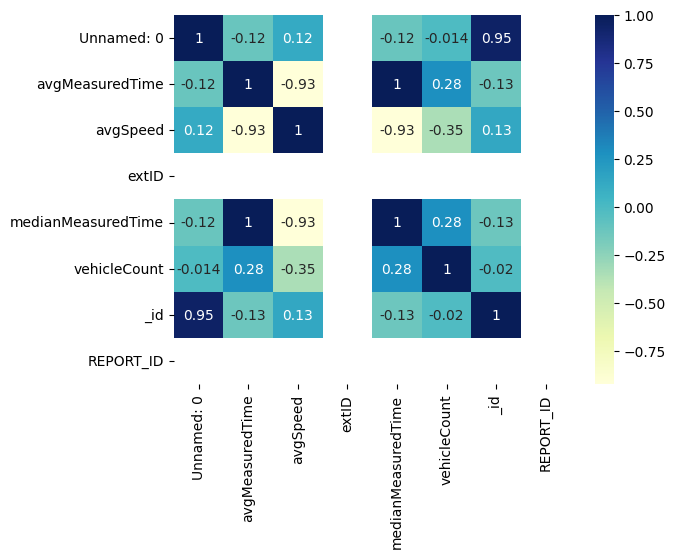

In [ ]:
df.corr()
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

In [ ]:
df.drop(columns=['extID','REPORT_ID','_id','Unnamed: 0','status','medianMeasuredTime'],inplace=True)
df.head()

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount
0,86,48,2014-02-13T11:30:00,4
1,91,45,2014-02-13T11:35:00,3
2,105,39,2014-02-13T11:40:00,7
3,112,36,2014-02-13T11:45:00,10
4,97,42,2014-02-13T11:50:00,8


In [ ]:
# Split string column into two new columns
df[['date', 'Time']] = df.TIMESTAMP.str.split("T", expand = True)
df

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,date,Time
0,86,48,2014-02-13T11:30:00,4,2014-02-13,11:30:00
1,91,45,2014-02-13T11:35:00,3,2014-02-13,11:35:00
2,105,39,2014-02-13T11:40:00,7,2014-02-13,11:40:00
3,112,36,2014-02-13T11:45:00,10,2014-02-13,11:45:00
4,97,42,2014-02-13T11:50:00,8,2014-02-13,11:50:00
...,...,...,...,...,...,...
55702,100,41,2014-11-13T10:20:00,0,2014-11-13,10:20:00
55703,100,41,2014-11-13T10:25:00,0,2014-11-13,10:25:00
55704,170,24,2014-11-13T10:30:00,2,2014-11-13,10:30:00
55705,150,27,2014-11-13T10:35:00,7,2014-11-13,10:35:00


In [ ]:
df[['hour', 'min','sec']] = df.Time.str.split(":", expand = True)
df

,avgMeasuredTime,avgSpeed,TIMESTAMP,vehicleCount,date,Time,hour,min,sec
0,86,48,2014-02-13T11:30:00,4,2014-02-13,11:30:00,11,30,00
1,91,45,2014-02-13T11:35:00,3,2014-02-13,11:35:00,11,35,00
2,105,39,2014-02-13T11:40:00,7,2014-02-13,11:40:00,11,40,00
3,112,36,2014-02-13T11:45:00,10,2014-02-13,11:45:00,11,45,00
4,97,42,2014-02-13T11:50:00,8,2014-02-13,11:50:00,11,50,00
...,...,...,...,...,...,...,...,...,...
55702,100,41,2014-11-13T10:20:00,0,2014-11-13,10:20:00,10,20,00
55703,100,41,2014-11-13T10:25:00,0,2014-11-13,10:25:00,10,25,00
55704,170,24,2014-11-13T10:30:00,2,2014-11-13,10:30:00,10,30,00
55705,150,27,2014-11-13T10:35:00,7,2014-11-13,10:35:00,10,35,00


In [ ]:
df[['year', 'month','day']] = df.date.str.split("-", expand = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55707 entries, 0 to 55706
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   avgMeasuredTime  55707 non-null  int64 
 1   avgSpeed         55707 non-null  int64 
 2   TIMESTAMP        55707 non-null  object
 3   vehicleCount     55707 non-null  int64 
 4   date             55707 non-null  object
 5   Time             55707 non-null  object
 6   hour             55707 non-null  object
 7   min              55707 non-null  object
 8   sec              55707 non-null  object
 9   year             55707 non-null  object
 10  month            55707 non-null  object
 11  day              55707 non-null  object
dtypes: int64(3), object(9)
memory usage: 5.1+ MB


In [ ]:
df['hour']=df['hour'].astype(int)
df['min']=df['min'].astype(int)
df['sec']=df['sec'].astype(int)
df['year']=df['year'].astype(int)
df['month']=df['month'].astype(int)
df['day']=df['day'].astype(int)
df.drop(columns=['date','Time'],inplace=True)

In [ ]:
df.drop(columns=['sec','year','min'],inplace=True)

In [ ]:
df3 = pd.DataFrame(columns=df.columns)
#from 5min to 1hour
for m in df['month'].unique():
    for d in df['day'].unique():
        for h in df['hour'].unique():
            DDD=df[(df['hour'] == h)&(df['day'] == d)&(df['month'] == m)]
            if DDD['avgSpeed'].mean() > 0:
                #print([[DDD['avgMeasuredTime'].mean(),DDD['avgSpeed'].mean(),DDD['vehicleCount'].sum(),DDD['M'].mean(),DDD['D'].mean(),DDD['H'].mean()]])
                df4=pd.DataFrame([[DDD['avgMeasuredTime'].mean(),DDD['avgSpeed'].mean(),DDD['TIMESTAMP'].values[0],
                                   DDD['vehicleCount'].sum(),DDD['month'].mean(),DDD['day'].mean(),DDD['hour'].mean()]],
                                     columns=['avgMeasuredTime','avgSpeed','TIMESTAMP','vehicleCount','month','day','hour'])
                df3=pd.concat([df3,df4],ignore_index=True)

#extract datetime from timestamp
date_time = pd.to_datetime(df3.pop('TIMESTAMP'), format='%Y-%m-%dT%H:%M:%S')

In [ ]:
df=df3
df

,avgMeasuredTime,avgSpeed,vehicleCount,hour,month,day
0,94.333333,44.166667,37,11.0,2.0,13.0
1,104.750000,39.666667,99,12.0,2.0,13.0
2,111.333333,37.416667,136,13.0,2.0,13.0
3,128.500000,32.083333,150,14.0,2.0,13.0
4,107.250000,39.250000,125,15.0,2.0,13.0
...,...,...,...,...,...,...
5023,122.500000,34.916667,67,6.0,11.0,12.0
5024,117.500000,36.500000,72,7.0,11.0,12.0
5025,99.916667,41.916667,69,8.0,11.0,12.0
5026,110.750000,38.166667,65,9.0,11.0,12.0


<ipython-input-17-12888bfa05cc>:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot( 'x','y', data=df1, color='skyblue')


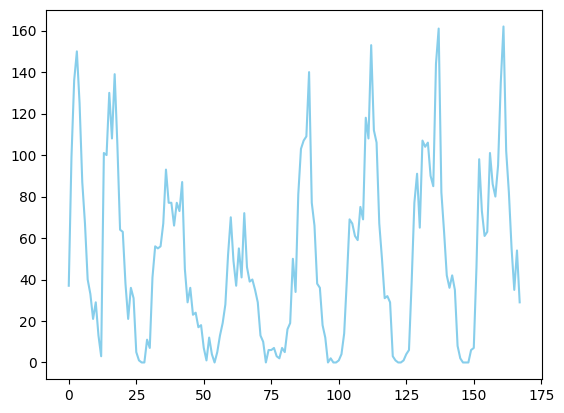

In [ ]:
df1=pd.DataFrame({'x':range(168-0), 'y':np.array(df['vehicleCount'])[0:168] })

# Draw plot
plt.plot( 'x','y', data=df1, color='skyblue')
plt.show()

<ipython-input-18-af6c0056e580>:4: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot( 'x','y', data=df1, color='skyblue')


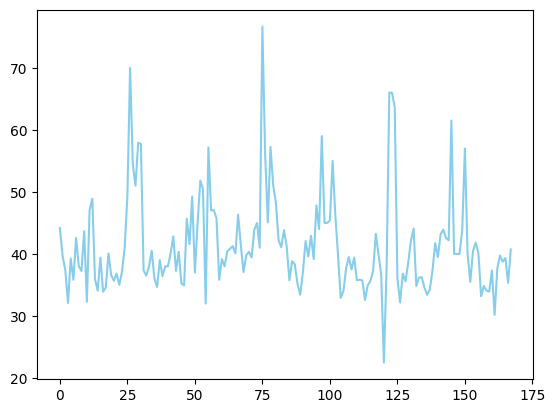

In [ ]:
df1=pd.DataFrame({'x':range(168-0), 'y':np.array(df['avgSpeed'])[0:168] })

# Draw plot
plt.plot( 'x','y', data=df1, color='skyblue')
plt.show()


In [ ]:
#date_time = pd.to_datetime(df.pop('TIMESTAMP'),format='%Y-%m-%dT%H:%M:%S')
timestamp_s = date_time.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
#df['Weekday'] = [datetime.weekday(date) for date in date_time]
#df["IsWeekend"] = df["Weekday"] >= 5

df.head()
timestamp_s

0       1.392291e+09
1       1.392293e+09
2       1.392296e+09
3       1.392300e+09
4       1.392304e+09
            ...     
5023    1.415772e+09
5024    1.415776e+09
5025    1.415779e+09
5026    1.415783e+09
5027    1.415786e+09
Name: TIMESTAMP, Length: 5028, dtype: float64

In [ ]:
mean = df.mean()
std = df.std()
df = (df - mean) / std
df.head()

,avgMeasuredTime,avgSpeed,vehicleCount,hour,month,day,Day sin,Day cos,Year sin,Year cos
0,-0.438201,0.164485,-0.208904,-0.068605,-1.510077,-0.250861,0.183409,-1.395105,0.742746,1.777563
1,0.153914,-0.389065,1.353849,0.076209,-1.510077,-0.250861,-0.001508,-1.407180,0.743052,1.777070
2,0.528130,-0.665840,2.286459,0.221023,-1.510077,-0.250861,-0.368176,-1.359085,0.743665,1.776081
3,1.503935,-1.321900,2.639339,0.365838,-1.510077,-0.250861,-0.709857,-1.218078,0.744277,1.775092
4,0.296021,-0.440320,2.009197,0.510652,-1.510077,-0.250861,-1.003265,-0.993768,0.744888,1.774102


Text(0.5, 1.0, 'comparaison entre datetime(heure) et')

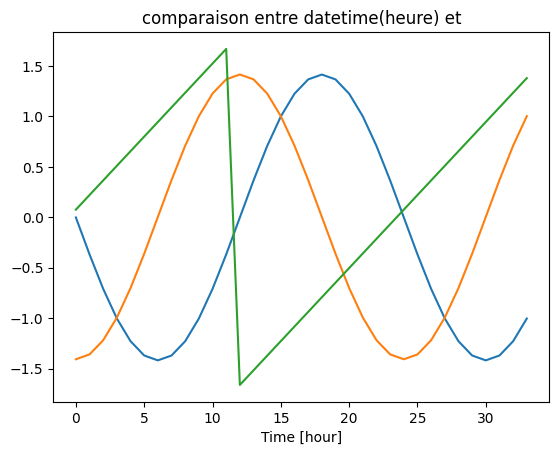

In [ ]:
#affichage de 24 h
#1h -> 12 rows
plt.plot(np.array(df['Day sin'])[14:48], label='Day sin')
plt.plot(np.array(df['Day cos'])[14:48], label='Day cos')
plt.plot(np.array(df['hour'])[14:48], label='hour')
plt.xlabel('Time [hour]')
plt.title('comparaison entre datetime(heure) et')

In [ ]:
df.drop(columns=['hour','month','day'],inplace=True)

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

Data windowing

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
w1 = WindowGenerator(input_width=24, label_width=24,shift=1,
                     label_columns=['avgSpeed'])
w1.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 24, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None, 24, 1), dtype=tf.float32, name=None))>

In [ ]:
def plot(self, model=None, plot_col='avgSpeed', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  print(plot_col_index)
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [1h]')

WindowGenerator.plot = plot


In [ ]:
def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='hour')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,)
                      ##callbacks=[early_stopping])
  return history

CNN

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
single_step_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['avgSpeed'])
single_step_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['avgSpeed']

In [ ]:
baseline = Baseline(label_index=column_indices['avgSpeed'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

31/31 [==============================] - 0s 5ms/step - loss: 0.8141 - mean_absolute_error: 0.6429


In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['avgSpeed'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['avgSpeed']

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 7)
Output shape: (32, 24, 1)


1


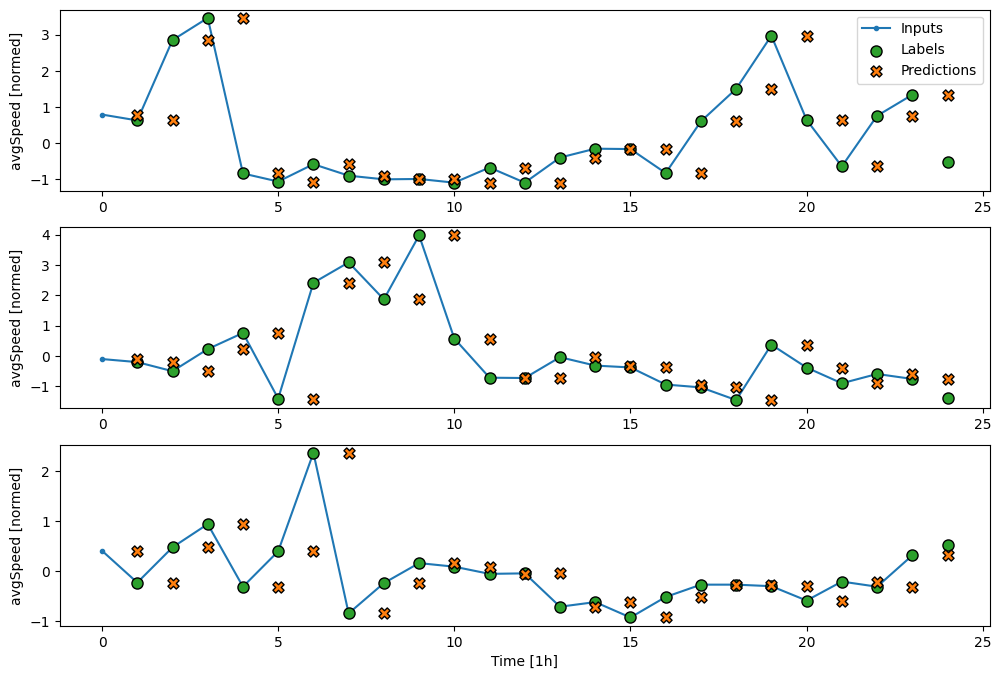

In [ ]:
wide_window.plot(baseline)

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 24, 7)
Output shape: (32, 24, 1)


In [ ]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,)
                      ##callbacks=[early_stopping])
  return history

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
110/110 [==============================] - 3s 7ms/step - loss: 0.9510 - mean_absolute_error: 0.6987 - val_loss: 0.7415 - val_mean_absolute_error: 0.6233
Epoch 2/100
110/110 [==============================] - 1s 6ms/step - loss: 0.7779 - mean_absolute_error: 0.6289 - val_loss: 0.6536 - val_mean_absolute_error: 0.5833
Epoch 3/100
110/110 [==============================] - 1s 7ms/step - loss: 0.6889 - mean_absolute_error: 0.5920 - val_loss: 0.6128 - val_mean_absolute_error: 0.5644
Epoch 4/100
110/110 [==============================] - 1s 6ms/step - loss: 0.6461 - mean_absolute_error: 0.5728 - val_loss: 0.5962 - val_mean_absolute_error: 0.5557
Epoch 5/100
110/110 [==============================] - 1s 6ms/step - loss: 0.6267 - mean_absolute_error: 0.5625 - val_loss: 0.5886 - val_mean_absolute_error: 0.5504
Epoch 6/100
110/110 [==============================] - 1s 6ms/step - loss: 0.6177 - mean_absolute_error: 0.5567 - val_loss: 0.5844 - val_mean_absolute_error: 0.5464
Epoch 7/10

1


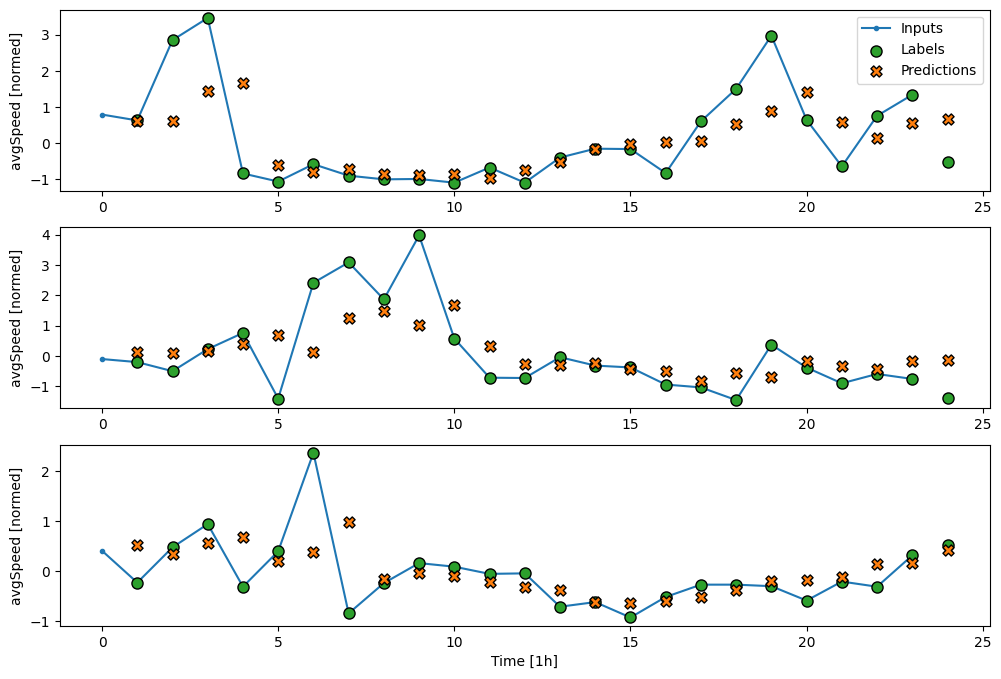

In [ ]:
wide_window.plot(linear)

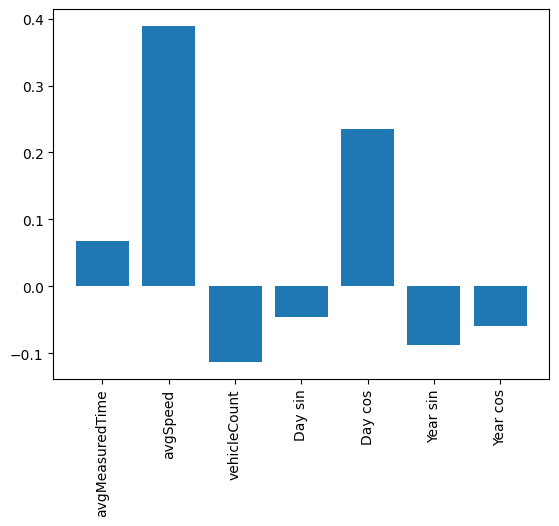

In [ ]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, wide_window)

val_performance['Dense'] = dense.evaluate(wide_window.val)
performance['Dense'] = dense.evaluate(wide_window.test, verbose=0)

Epoch 1/100
110/110 [==============================] - 3s 12ms/step - loss: 0.6197 - mean_absolute_error: 0.5537 - val_loss: 0.5391 - val_mean_absolute_error: 0.5194
Epoch 2/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5682 - mean_absolute_error: 0.5221 - val_loss: 0.5292 - val_mean_absolute_error: 0.5141
Epoch 3/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5551 - mean_absolute_error: 0.5145 - val_loss: 0.5320 - val_mean_absolute_error: 0.5251
Epoch 4/100
110/110 [==============================] - 1s 9ms/step - loss: 0.5445 - mean_absolute_error: 0.5092 - val_loss: 0.5409 - val_mean_absolute_error: 0.5352
Epoch 5/100
110/110 [==============================] - 1s 7ms/step - loss: 0.5343 - mean_absolute_error: 0.5041 - val_loss: 0.5427 - val_mean_absolute_error: 0.5361
Epoch 6/100
110/110 [==============================] - 1s 7ms/step - loss: 0.5256 - mean_absolute_error: 0.4996 - val_loss: 0.5403 - val_mean_absolute_error: 0.5292
Epoch 7/1

1


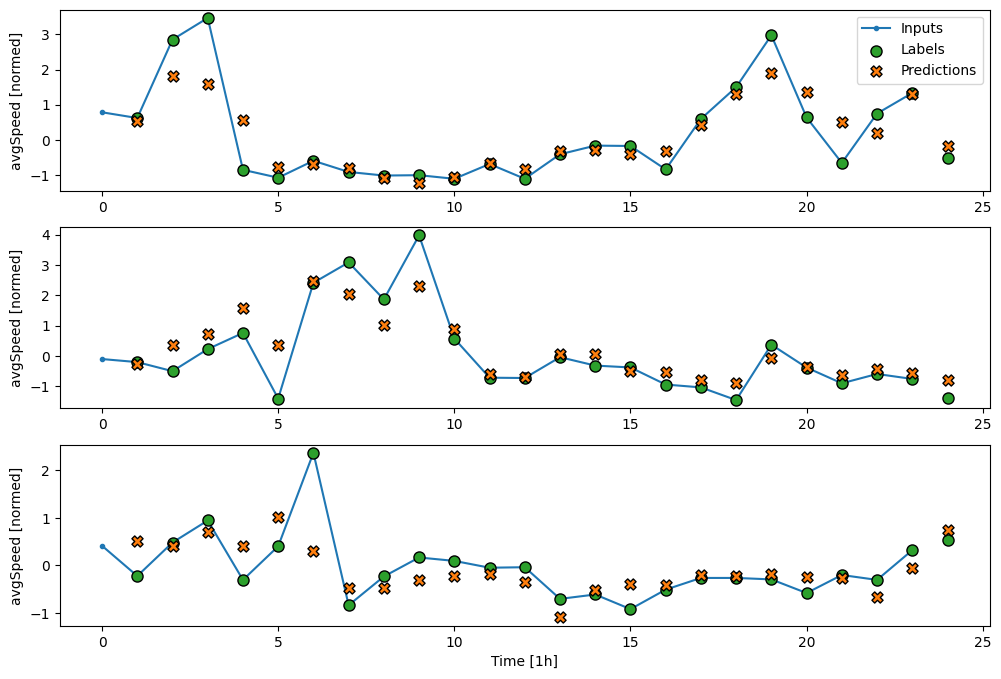

In [ ]:
wide_window.plot(dense)

In [ ]:
CONV_WIDTH = 24
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=24,
    shift=1,
    label_columns=['avgSpeed'])

conv_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['avgSpeed']

1


Text(0.5, 1.0, 'Given 24h  of inputs, predict 1h into the future.')

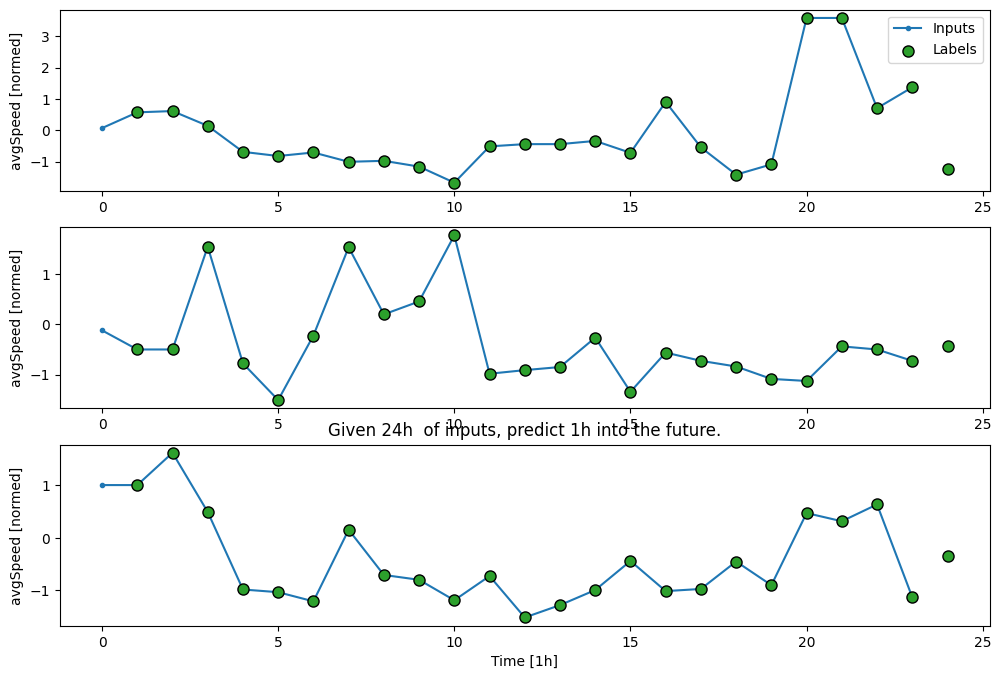

In [ ]:
conv_window.plot(plot_col="avgSpeed")
plt.title("Given 24h  of inputs, predict 1h into the future.")

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 24, 7)
Output shape: (32, 1, 1)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

Epoch 1/100
110/110 [==============================] - 2s 7ms/step - loss: 0.9167 - mean_absolute_error: 0.7013 - val_loss: 0.9779 - val_mean_absolute_error: 0.7144
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: 0.8680 - mean_absolute_error: 0.6814 - val_loss: 0.9478 - val_mean_absolute_error: 0.7094
Epoch 3/100
110/110 [==============================] - 1s 10ms/step - loss: 0.8612 - mean_absolute_error: 0.6787 - val_loss: 0.9371 - val_mean_absolute_error: 0.7066
Epoch 4/100
110/110 [==============================] - 1s 11ms/step - loss: 0.8581 - mean_absolute_error: 0.6773 - val_loss: 0.9272 - val_mean_absolute_error: 0.7066
Epoch 5/100
110/110 [==============================] - 1s 7ms/step - loss: 0.8564 - mean_absolute_error: 0.6766 - val_loss: 0.9233 - val_mean_absolute_error: 0.7086
Epoch 6/100
110/110 [==============================] - 1s 7ms/step - loss: 0.8550 - mean_absolute_error: 0.6760 - val_loss: 0.9208 - val_mean_absolute_error: 0.7072
Epoch 7/

In [ ]:
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

31/31 [==============================] - 0s 6ms/step - loss: 0.9087 - mean_absolute_error: 0.7089


1


ValueError: ignored

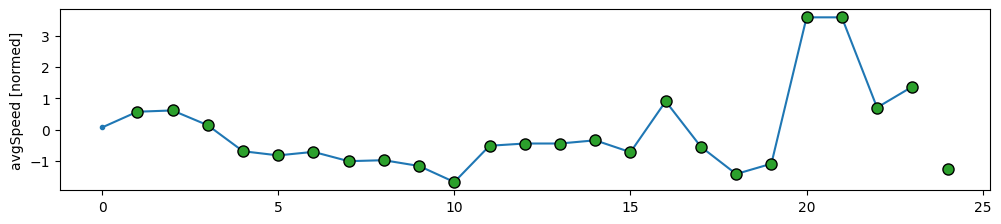

In [ ]:
conv_window.plot(multi_step_dense)

CNN

In [ ]:
CONV_WIDTH = 24
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=24,
    shift=1,
    label_columns=['avgSpeed'])

conv_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['avgSpeed']

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
df.columns

Index(['avgMeasuredTime', 'avgSpeed', 'vehicleCount', 'Day sin', 'Day cos',
       'Year sin', 'Year cos'],
      dtype='object')

In [ ]:
history = compile_and_fit(conv_model, conv_window)

Epoch 1/100
110/110 [==============================] - 7s 9ms/step - loss: 0.8781 - mean_absolute_error: 0.6825 - val_loss: 0.9237 - val_mean_absolute_error: 0.7119
Epoch 2/100
110/110 [==============================] - 1s 7ms/step - loss: 0.8557 - mean_absolute_error: 0.6757 - val_loss: 0.9173 - val_mean_absolute_error: 0.7112
Epoch 3/100
110/110 [==============================] - 1s 7ms/step - loss: 0.8534 - mean_absolute_error: 0.6749 - val_loss: 0.9142 - val_mean_absolute_error: 0.7093
Epoch 4/100
110/110 [==============================] - 1s 7ms/step - loss: 0.8525 - mean_absolute_error: 0.6748 - val_loss: 0.9142 - val_mean_absolute_error: 0.7089
Epoch 5/100
110/110 [==============================] - 1s 8ms/step - loss: 0.8521 - mean_absolute_error: 0.6747 - val_loss: 0.9139 - val_mean_absolute_error: 0.7066
Epoch 6/100
110/110 [==============================] - 1s 9ms/step - loss: 0.8516 - mean_absolute_error: 0.6744 - val_loss: 0.9130 - val_mean_absolute_error: 0.7092
Epoch 7/10

In [ ]:
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

31/31 [==============================] - 0s 5ms/step - loss: 0.9088 - mean_absolute_error: 0.7114


1


ValueError: ignored

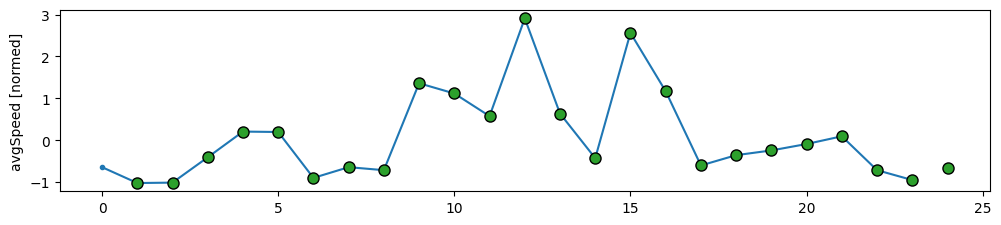

In [ ]:
conv_window.plot(conv_model,plot_col="avgSpeed")

In [ ]:
CONV_WIDTH=2
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['avgSpeed'])

wide_conv_window

Total window size: 26
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Label indices: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]
Label column name(s): ['avgSpeed']

In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [ ]:
print("Conv model on `wide_conv_window`")
print('Input shape:', wide_conv_window.example[0].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Conv model on `wide_conv_window`
Input shape: (32, 25, 7)
Output shape: (32, 24, 1)


In [ ]:
history = compile_and_fit(conv_model, wide_conv_window)

Epoch 1/100
110/110 [==============================] - 2s 9ms/step - loss: 0.7005 - mean_absolute_error: 0.6101 - val_loss: 0.5661 - val_mean_absolute_error: 0.5354
Epoch 2/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5753 - mean_absolute_error: 0.5304 - val_loss: 0.5678 - val_mean_absolute_error: 0.5309
Epoch 3/100
110/110 [==============================] - 1s 7ms/step - loss: 0.5606 - mean_absolute_error: 0.5209 - val_loss: 0.5686 - val_mean_absolute_error: 0.5331
Epoch 4/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5491 - mean_absolute_error: 0.5151 - val_loss: 0.5672 - val_mean_absolute_error: 0.5364
Epoch 5/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5406 - mean_absolute_error: 0.5106 - val_loss: 0.5676 - val_mean_absolute_error: 0.5409
Epoch 6/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5327 - mean_absolute_error: 0.5065 - val_loss: 0.5779 - val_mean_absolute_error: 0.5469
Epoch 7/10

1


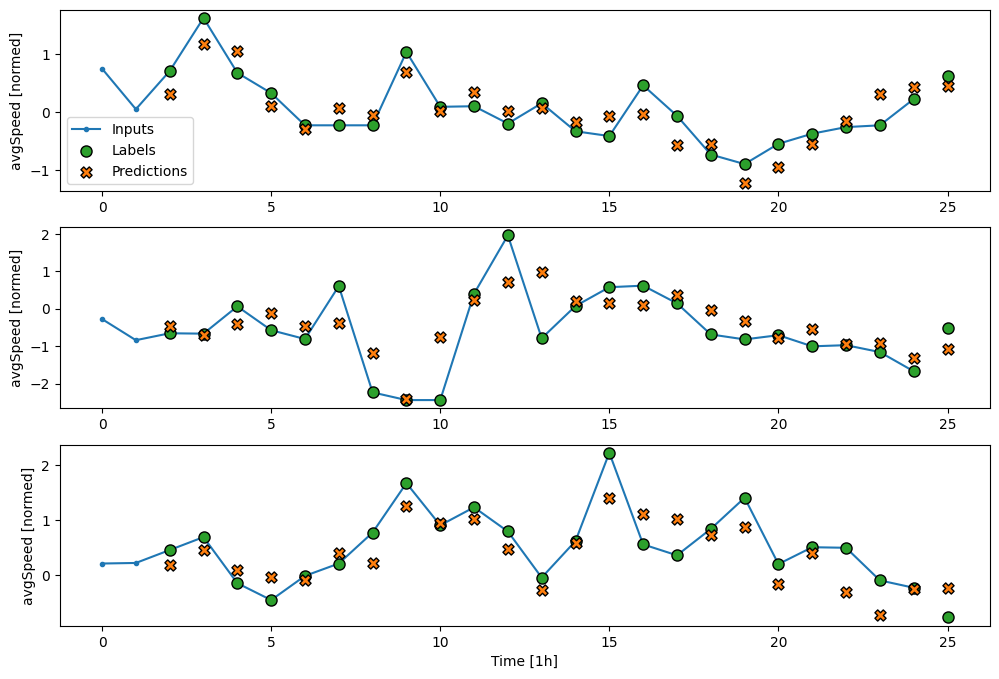

In [ ]:
wide_conv_window.plot(conv_model,plot_col="avgSpeed")

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
110/110 [==============================] - 5s 12ms/step - loss: 0.6558 - mean_absolute_error: 0.5724 - val_loss: 0.6285 - val_mean_absolute_error: 0.5605
Epoch 2/100
110/110 [==============================] - 1s 9ms/step - loss: 0.5996 - mean_absolute_error: 0.5454 - val_loss: 0.5935 - val_mean_absolute_error: 0.5481
Epoch 3/100
110/110 [==============================] - 1s 9ms/step - loss: 0.5834 - mean_absolute_error: 0.5366 - val_loss: 0.5708 - val_mean_absolute_error: 0.5369
Epoch 4/100
110/110 [==============================] - 1s 9ms/step - loss: 0.5721 - mean_absolute_error: 0.5302 - val_loss: 0.5623 - val_mean_absolute_error: 0.5302
Epoch 5/100
110/110 [==============================] - 2s 14ms/step - loss: 0.5621 - mean_absolute_error: 0.5247 - val_loss: 0.5588 - val_mean_absolute_error: 0.5285
Epoch 6/100
110/110 [==============================] - 1s 10ms/step - loss: 0.5539 - mean_absolute_error: 0.5203 - val_loss: 0.5654 - val_mean_absolute_error: 0.5337
Epoch 7

1


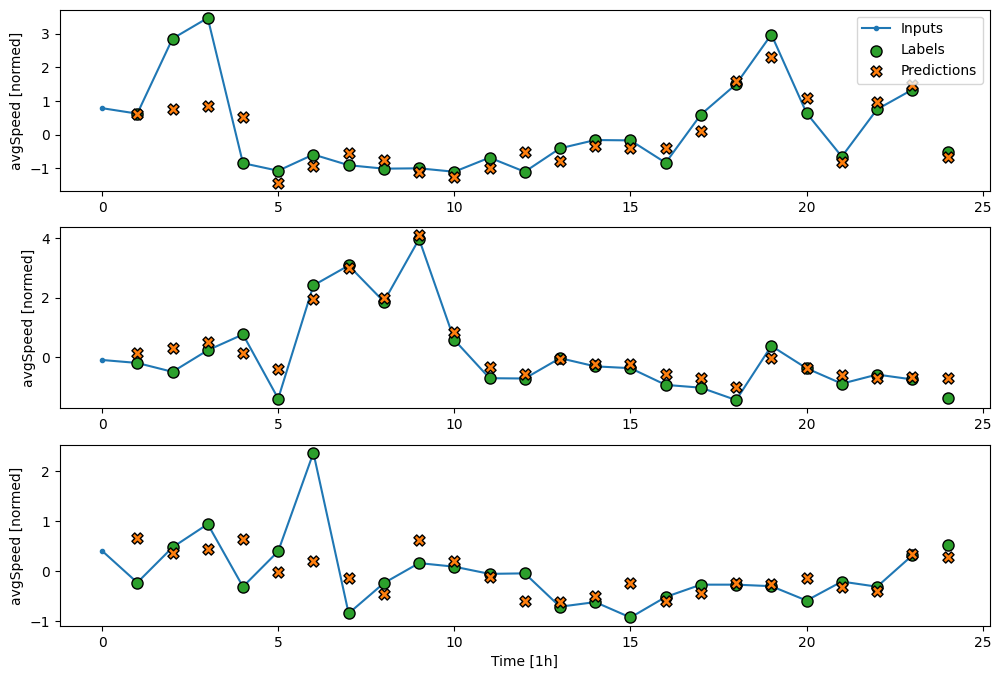

In [ ]:
wide_window.plot(lstm_model)

In [ ]:
GRU =  tf.keras.models.Sequential([
# First GRU layer with Dropout regularisation
      tf.keras.layers.GRU(32, return_sequences=True),
      tf.keras.layers.Dense(units=1)
    ])

In [ ]:
history = compile_and_fit(GRU, wide_window)

Epoch 1/100
110/110 [==============================] - 4s 11ms/step - loss: 0.6582 - mean_absolute_error: 0.5756 - val_loss: 0.6047 - val_mean_absolute_error: 0.5522
Epoch 2/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5992 - mean_absolute_error: 0.5428 - val_loss: 0.5794 - val_mean_absolute_error: 0.5391
Epoch 3/100
110/110 [==============================] - 1s 8ms/step - loss: 0.5862 - mean_absolute_error: 0.5353 - val_loss: 0.5680 - val_mean_absolute_error: 0.5331
Epoch 4/100
110/110 [==============================] - 1s 13ms/step - loss: 0.5780 - mean_absolute_error: 0.5309 - val_loss: 0.5573 - val_mean_absolute_error: 0.5281
Epoch 5/100
110/110 [==============================] - 1s 11ms/step - loss: 0.5711 - mean_absolute_error: 0.5270 - val_loss: 0.5562 - val_mean_absolute_error: 0.5266
Epoch 6/100
110/110 [==============================] - 1s 10ms/step - loss: 0.5651 - mean_absolute_error: 0.5233 - val_loss: 0.5535 - val_mean_absolute_error: 0.5239
Epoch 

1


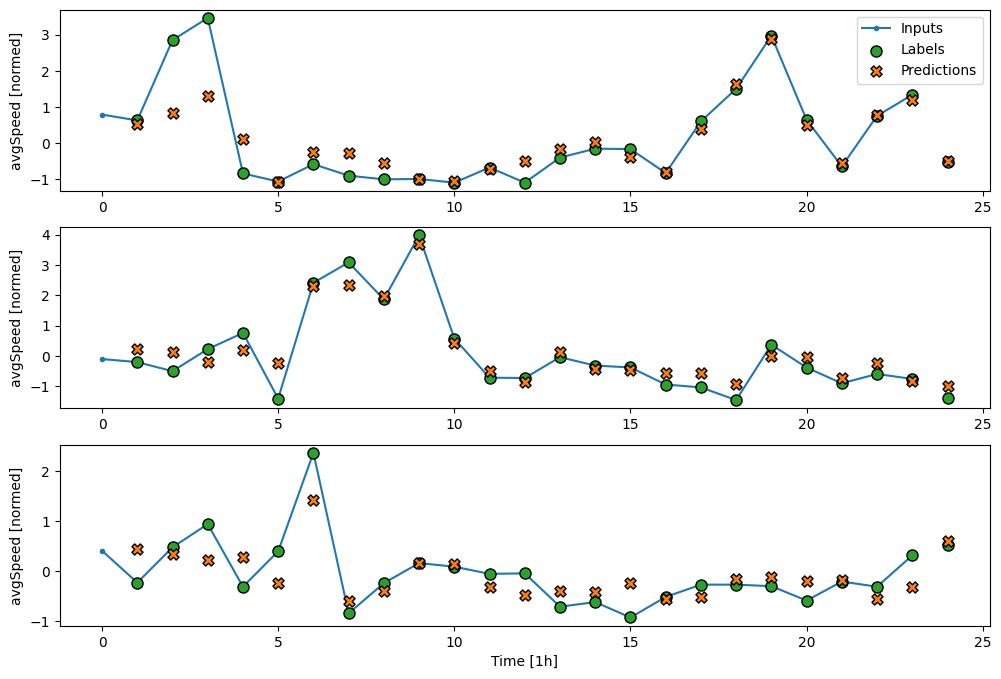

In [ ]:
wide_window.plot(GRU)

In [ ]:
ConvLSTM_model = tf.keras.models.Sequential([
tf.keras.layers.Reshape((1,24,7)),
tf.keras.layers.ConvLSTM1D(filters=64, kernel_size=(1), input_shape=(1,24,7)),
tf.keras.layers.Dense(units=24),
tf.keras.layers.Dense(units=6),
tf.keras.layers.Dense(units=1)])

history = compile_and_fit(ConvLSTM_model, wide_window)

val_performance['ConvLSTM1D'] = ConvLSTM_model.evaluate(wide_window.val)

performance['ConvLSTM1D'] = ConvLSTM_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
110/110 [==============================] - 9s 40ms/step - loss: 0.6358 - mean_absolute_error: 0.5620 - val_loss: 0.5638 - val_mean_absolute_error: 0.5335
Epoch 2/100
110/110 [==============================] - 2s 20ms/step - loss: 0.5933 - mean_absolute_error: 0.5398 - val_loss: 0.5583 - val_mean_absolute_error: 0.5340
Epoch 3/100
110/110 [==============================] - 2s 18ms/step - loss: 0.5896 - mean_absolute_error: 0.5380 - val_loss: 0.5603 - val_mean_absolute_error: 0.5346
Epoch 4/100
110/110 [==============================] - 2s 18ms/step - loss: 0.5871 - mean_absolute_error: 0.5372 - val_loss: 0.5590 - val_mean_absolute_error: 0.5341
Epoch 5/100
110/110 [==============================] - 2s 18ms/step - loss: 0.5845 - mean_absolute_error: 0.5359 - val_loss: 0.5560 - val_mean_absolute_error: 0.5324
Epoch 6/100
110/110 [==============================] - 3s 25ms/step - loss: 0.5821 - mean_absolute_error: 0.5345 - val_loss: 0.5566 - val_mean_absolute_error: 0.5349
Epoc

1


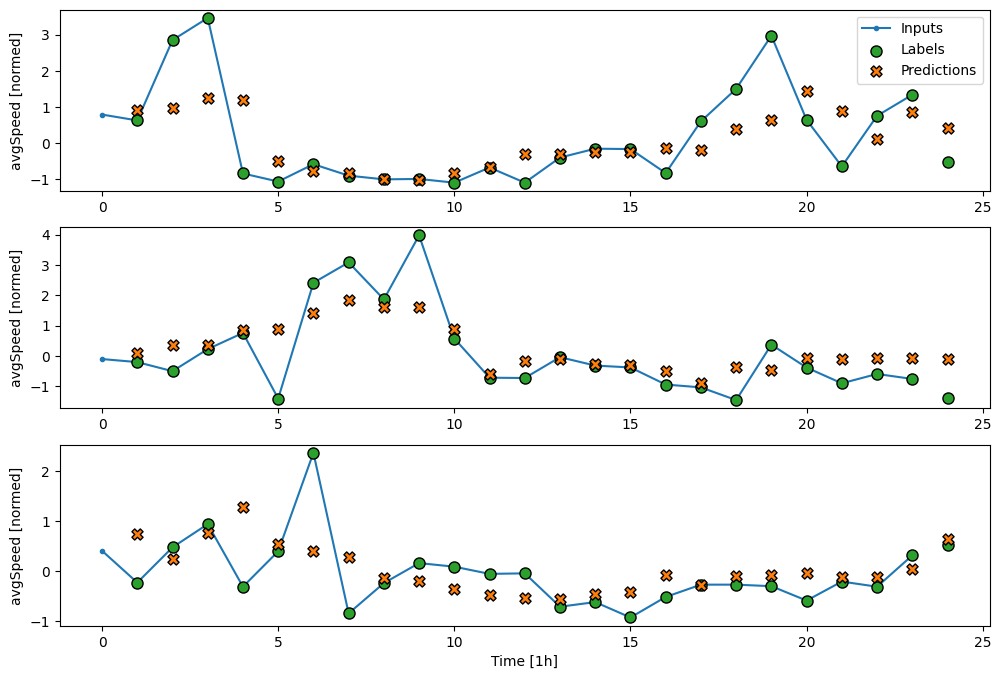

In [ ]:
wide_window.plot(ConvLSTM_model)

In [ ]:
Dlstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(24),
    tf.keras.layers.Dense(16),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=6),
    tf.keras.layers.Dense(units=1)])

In [ ]:
history = compile_and_fit(Dlstm_model, wide_window)

val_performance['Dlstm_model'] = Dlstm_model.evaluate(wide_window.val)

performance['Dlstm_model'] = Dlstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/100
110/110 [==============================] - 6s 19ms/step - loss: 0.6337 - mean_absolute_error: 0.5623 - val_loss: 0.6205 - val_mean_absolute_error: 0.5630
Epoch 2/100
110/110 [==============================] - 1s 11ms/step - loss: 0.5914 - mean_absolute_error: 0.5394 - val_loss: 0.5913 - val_mean_absolute_error: 0.5458
Epoch 3/100
110/110 [==============================] - 1s 11ms/step - loss: 0.5747 - mean_absolute_error: 0.5309 - val_loss: 0.5767 - val_mean_absolute_error: 0.5383
Epoch 4/100
110/110 [==============================] - 1s 11ms/step - loss: 0.5613 - mean_absolute_error: 0.5234 - val_loss: 0.5766 - val_mean_absolute_error: 0.5310
Epoch 5/100
110/110 [==============================] - 1s 11ms/step - loss: 0.5475 - mean_absolute_error: 0.5154 - val_loss: 0.5592 - val_mean_absolute_error: 0.5246
Epoch 6/100
110/110 [==============================] - 1s 12ms/step - loss: 0.5324 - mean_absolute_error: 0.5081 - val_loss: 0.5579 - val_mean_absolute_error: 0.5216
Epoc

1


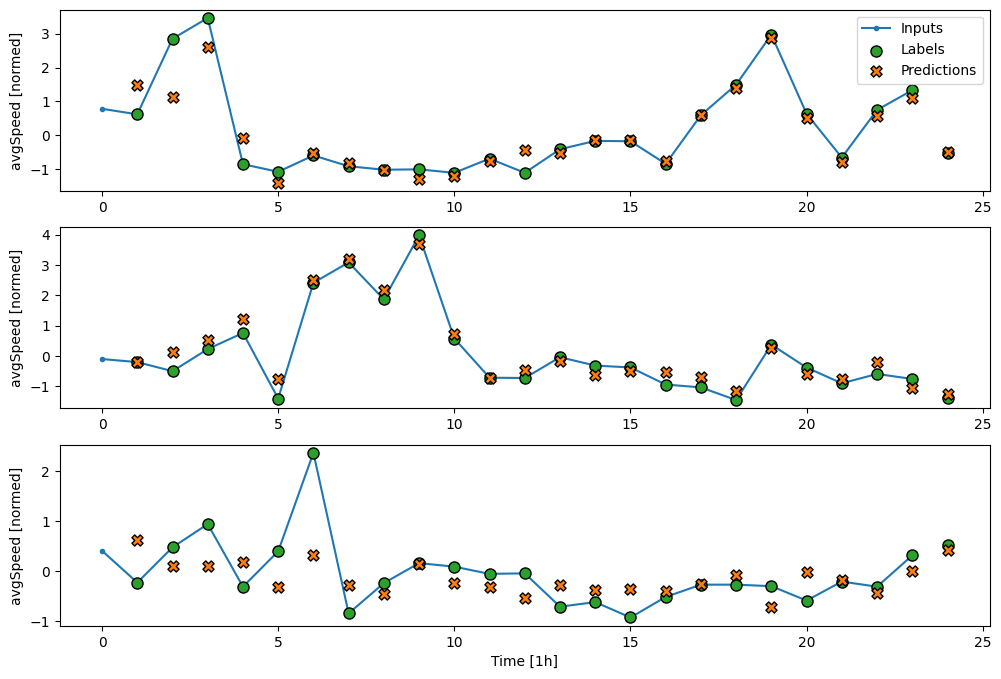

In [ ]:
wide_window.plot(Dlstm_model)